<a href="https://colab.research.google.com/github/Foutse/My_NLP_Projects/blob/master/Training_model_from_Movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958
https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456
https://deeperanalytics.be/blog/2016/12/19/sentiment-analysis-of-french-texts-using-deep-learning-techniques/
https://www.kdnuggets.com/2019/11/create-vocabulary-nlp-tasks-python.html

In [ ]:
# Some neccesary packages
# On importe la fonction de tokenisation en mots de NLTK
import nltk
import itertools
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.externals import joblib
from keras.layers import Conv1D, GRU, Activation, Dropout, MaxPooling1D, Flatten, \
    GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1]:
 from google.colab import drive
 drive.mount('/content/drive/')

In [ ]:
file_path = "/content/drive/data_file_path/movies_reviews.csv"
data = pd.read_csv(file_path,sep=';')
len(data)

594451

In [ ]:
data.columns

Index(['Unnamed: 0', 'genre', 'genre_count', 'movie_category', 'movie_title',
       'reviewer_name', 'review_date', 'reviewer_subscriber_count',
       'reviewer_rating', 'reviewer_comment'],
      dtype='object')

In [ ]:
data = data.drop(data.columns[0], axis=1)
data.columns

Index(['genre', 'genre_count', 'movie_category', 'movie_title',
       'reviewer_name', 'review_date', 'reviewer_subscriber_count',
       'reviewer_rating', 'reviewer_comment'],
      dtype='object')

In [ ]:
data.head()

,genre,genre_count,movie_category,movie_title,reviewer_name,review_date,reviewer_subscriber_count,reviewer_rating,reviewer_comment
0,Action,910.0,series,Fauda,Noam ???? D,2019-06-28,25.0,4.5,"Serie prenante, le jeu des acteurs est magnifi..."
1,Action,910.0,series,Fauda,Alix D,2018-05-31,47.0,5.0,Je mets très rarement la note excellente en sé...
2,Action,910.0,series,Fauda,Gab B,2018-01-03,17.0,5.0,"Excellente série,l'une des meilleures du momen..."
3,Action,910.0,series,Fauda,Baptiste R,2018-07-25,0.0,5.0,"Excellentissime,\nLa Saison 1 restait un peu c..."
4,Action,910.0,series,Fauda,Night&Day,2018-06-03,8.0,5.0,Une série qui touche de très près à la réalité...


In [ ]:
data_withnoNan= data.dropna()

In [ ]:
data_withnoNan = data_withnoNan.drop_duplicates(keep='first', inplace=False)

In [ ]:
len(data_withnoNan), len(data)

(256346, 594451)

In [ ]:
my_donees= data[["reviewer_comment","reviewer_rating"]]

In [ ]:
my_donees = my_donees.dropna()

In [ ]:
my_donees.head()

,reviewer_comment,reviewer_rating
0,"Serie prenante, le jeu des acteurs est magnifi...",4.5
1,Je mets très rarement la note excellente en sé...,5.0
2,"Excellente série,l'une des meilleures du momen...",5.0
3,"Excellentissime,\nLa Saison 1 restait un peu c...",5.0
4,Une série qui touche de très près à la réalité...,5.0


In [ ]:
len(my_donees)

593575

In [ ]:
len(data)-len(my_donees)

876

### Our total dataset without nans is 593575

In [ ]:
data_withnoNan.genre.unique()

array(['Action', 'Animation', 'Arts Martiaux', 'Aventure', 'Biopic',
       'Classique', 'Comédie', 'Comédie dramatique', 'Comédie musicale',
       'Dessin animé', 'Divers', 'Documentaire', 'Drama', 'Drame',
       'Epouvante-horreur', 'Erotique', 'Espionnage', 'Famille',
       'Fantastique', 'Guerre', 'Historique', 'Judiciaire', 'Médical',
       'Musical', 'Péplum', 'Policier', 'Romance', 'Science fiction',
       'Show', 'Soap', 'Sport event', 'Thriller', 'Websérie', 'Western'],
      dtype=object)

# Total number of movies

In [ ]:
numberof_movies= data_withnoNan.movie_title.unique()
len(numberof_movies)
#Here we have 5325 distingue movies

5325

# Total number of reviewers

In [ ]:
reviewerof_movies= data_withnoNan.reviewer_name.unique()
len(reviewerof_movies)
#We have 48863 distingue reviewers

48863

In [ ]:
Freqmovies= pd.DataFrame(data_withnoNan.movie_title) 
Freq_moviess = pd.DataFrame({'Movie_title': Freqmovies.movie_title.unique() ,
                   'count': Freqmovies.movie_title.value_counts()})

In [ ]:
Freq_moviess.reset_index(drop=True, inplace=True)
Freq_moviess.head()

,Movie_title,count
0,Fauda,1445
1,The Boys,1200
2,Buffy contre les vampires,1200
3,L'Attaque des Titans,1200
4,La reine du sud,1192


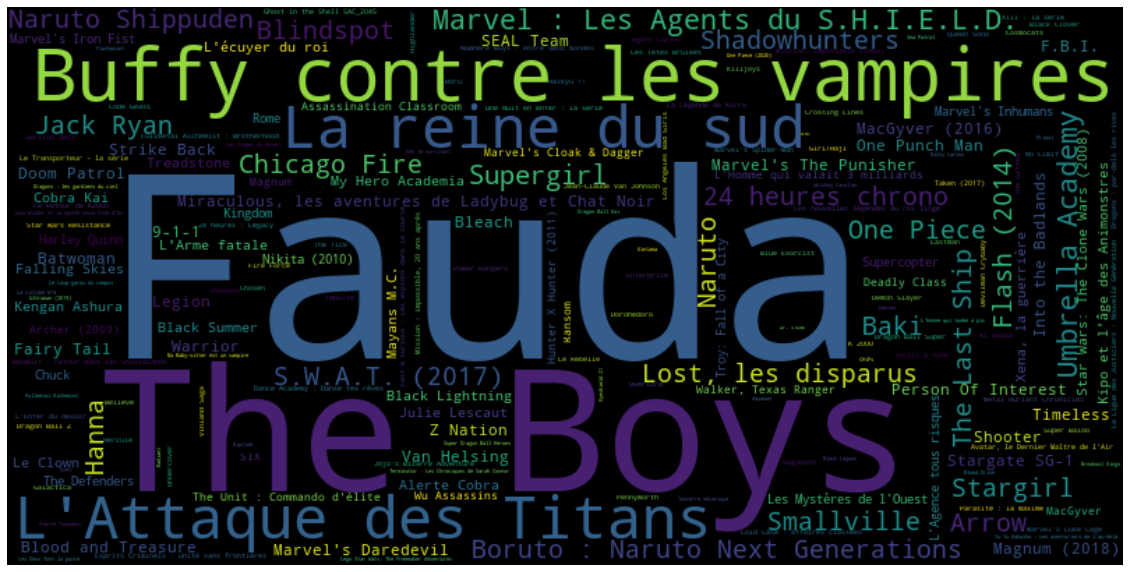

In [ ]:
dataMovie = dict(zip(Freq_moviess['Movie_title'].tolist(), Freq_moviess['count'].tolist()))
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataMovie)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
textdatas= my_donees 
textdatas.head()

,reviewer_comment,reviewer_rating
0,"Serie prenante, le jeu des acteurs est magnifi...",4.5
1,Je mets très rarement la note excellente en sé...,5.0
2,"Excellente série,l'une des meilleures du momen...",5.0
3,"Excellentissime,\nLa Saison 1 restait un peu c...",5.0
4,Une série qui touche de très près à la réalité...,5.0


We drop duplicates


In [ ]:
textdata = textdatas.drop_duplicates(keep='first', inplace=False)

In [ ]:
textdata.head()

,reviewer_comment,reviewer_rating
0,"Serie prenante, le jeu des acteurs est magnifi...",4.5
1,Je mets très rarement la note excellente en sé...,5.0
2,"Excellente série,l'une des meilleures du momen...",5.0
3,"Excellentissime,\nLa Saison 1 restait un peu c...",5.0
4,Une série qui touche de très près à la réalité...,5.0


In [ ]:
len(textdata)

125769

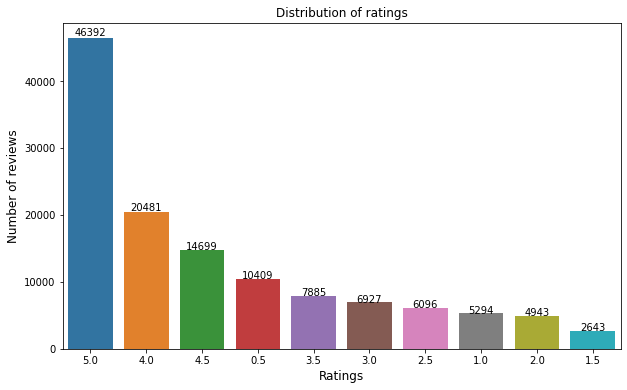

In [ ]:
rating_count = textdata.reviewer_rating.value_counts()
X = rating_count.index 
Y = rating_count.values 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
plt.title('Distribution of ratings', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [ ]:
options = [4.0, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5] 
reduced_textdata = textdata[textdata['reviewer_rating'].isin(options)] 


In [ ]:
reduced_textdata.head()

,reviewer_comment,reviewer_rating
8,Une bonne serie mais un peu trop pro israélien...,4.0
17,Assurément l'une des cinq meilleures séries da...,4.0
20,Une première saison moyenne qui manquait d'epa...,4.0
22,"Quelle déception, cette série n'est malheureus...",1.5
25,Très déçu par la saison 3 qui était très atten...,2.0


In [ ]:
len(reduced_textdata)

56793

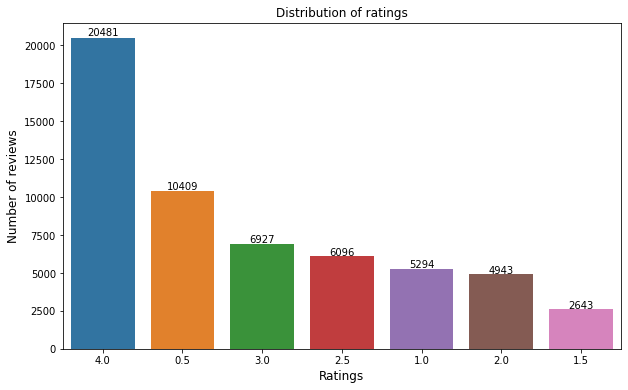

In [ ]:
rating_count = reduced_textdata.reviewer_rating.value_counts()
X = rating_count.index 
Y = rating_count.values 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
plt.title('Distribution of ratings', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [ ]:
def discretise_rating(df, column, from_value, to_value, replace_value):
    df[column] = np.where((df[column]>=from_value)&(df[column]<= to_value), replace_value, df[column])
    return df
#4 -> 2 Positive
#[2,3] -> 1 Neutral
#[0.5, 1.5 ]-> 0 Negative

In [ ]:
clean_data = discretise_rating(reduced_textdata, 'reviewer_rating', 0.5, 1.5, 0)
clean_data = discretise_rating(reduced_textdata, 'reviewer_rating', 2, 3, 1)
clean_data = discretise_rating(reduced_textdata, 'reviewer_rating', 4, 4, 2)
clean_data['reviewer_rating'] = reduced_textdata['reviewer_rating'].astype(int)
clean_data['reviewer_rating'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([2, 0, 1])

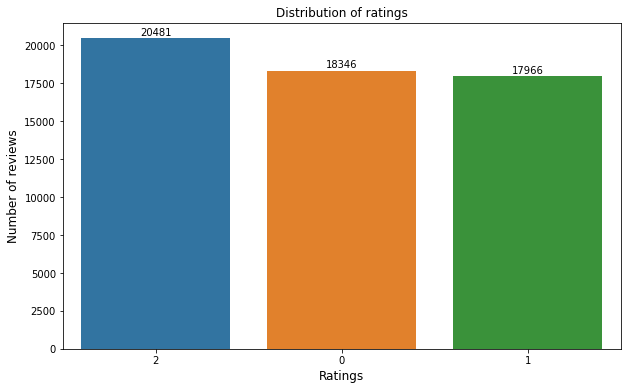

In [ ]:
rating_count = clean_data.reviewer_rating.value_counts()
X = rating_count.index 
Y = rating_count.values 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
plt.title('Distribution of ratings', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

Now that we have a reasonable data set, we can now use it to train our model, before, let's do some preprocessing on the text.

In [ ]:
# We put all the words to lower case.
clean_data['reviewer_comment'] = clean_data['reviewer_comment'].map(lambda reviewer_comment: reviewer_comment.lower())
clean_data['reviewer_comment'] = clean_data['reviewer_comment'].map(lambda reviewer_comment: reviewer_comment.split())
clean_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviewer_comment,reviewer_rating
8,"[une, bonne, serie, mais, un, peu, trop, pro, ...",2
17,"[assurément, l'une, des, cinq, meilleures, sér...",2
20,"[une, première, saison, moyenne, qui, manquait...",2
22,"[quelle, déception,, cette, série, n'est, malh...",0
25,"[très, déçu, par, la, saison, 3, qui, était, t...",1


In [ ]:
comments = clean_data.reviewer_comment

Since we want to apply the model to french text, we will get rid of stop words as they don't add more meaning to a sentence.

In [ ]:
comments_nsw = [[word for word in review_words if not word in stop_words]
                      for review_words in comments]

In [ ]:
all_words = list(itertools.chain(*comments_nsw))

counts_word = collections.Counter(all_words)

counts_word.most_common(20)

[('série', 56388),
 ('a', 34877),
 ("c'est", 30096),
 ('cette', 28302),
 ('plus', 26767),
 ('très', 24560),
 ('bien', 24335),
 ('tout', 21793),
 ('!', 16097),
 ('peu', 14663),
 ('ça', 14250),
 ('si', 14142),
 ('saison', 13533),
 ('fait', 13106),
 ("j'ai", 12816),
 ('sans', 12785),
 ('personnages', 12606),
 ('comme', 12460),
 ('vraiment', 11662),
 ('trop', 10405)]

We can still observe some characters present which are not uselful, so we shall equaly get rid of them. We shall keep punctuation marks thought. As they add meaning to sentences:

In [ ]:
collection_words = [ "'",'``', "''", '^^', '--']

comments_nsw_collwrm = [[w for w in word if not w in collection_words]
                 for word in comments_nsw]

comments_nsw_collwrm[0]

['bonne',
 'serie',
 'peu',
 'trop',
 'pro',
 'israélienne',
 'mis',
 'a',
 'cela',
 'acteurs',
 'parfait.',
 'intrigue',
 'tiens',
 'haleine',
 'episode',
 'apres',
 'episode.',
 'a',
 'decouvrir']

In [ ]:
all_wordsclean = list(itertools.chain(*comments_nsw_collwrm))

countsclean_word = collections.Counter(all_wordsclean)

countsclean_word.most_common(20)

[('série', 56388),
 ('a', 34877),
 ("c'est", 30096),
 ('cette', 28302),
 ('plus', 26767),
 ('très', 24560),
 ('bien', 24335),
 ('tout', 21793),
 ('!', 16097),
 ('peu', 14663),
 ('ça', 14250),
 ('si', 14142),
 ('saison', 13533),
 ('fait', 13106),
 ("j'ai", 12816),
 ('sans', 12785),
 ('personnages', 12606),
 ('comme', 12460),
 ('vraiment', 11662),
 ('trop', 10405)]

Let us visualise the 10000 most common words in our data set

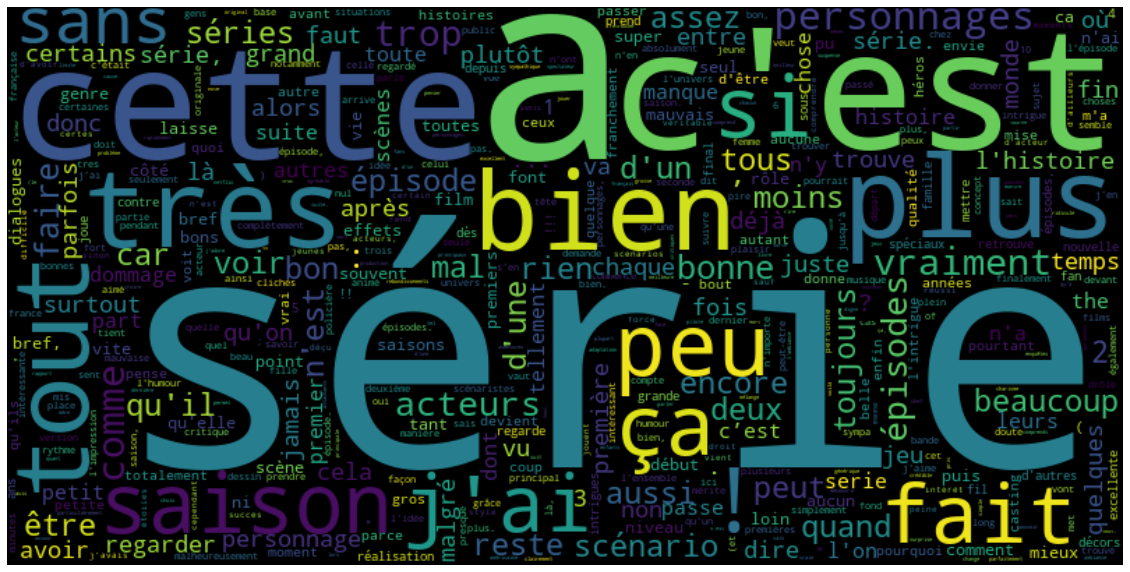

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
len(Clean_words), len(countsclean_word), len(comments_nsw_collwrm)

(10000, 212301, 56793)

At this point, the review texts are turned to mathematical vectors. 
  
*   Words of the text are replaced by their index in the dictionary.
*   Words that aren't present in the dictionary are simply skipped.
In order to ease the processing, I fix the size of the vectors to 500 words. 
*   Text with more words are trimmed to the first 500 words, and 
*   Text with fewer words are padded with 0.

 After this, every single review text is represented by a 500 integer vector with components between 0 and 10.000 (the size of the dictionary). This is the input data for the deep neural network that we are going to use.

In [ ]:
clean_data.head()

,reviewer_comment,reviewer_rating
8,"[une, bonne, serie, mais, un, peu, trop, pro, ...",2
17,"[assurément, l'une, des, cinq, meilleures, sér...",2
20,"[une, première, saison, moyenne, qui, manquait...",2
22,"[quelle, déception,, cette, série, n'est, malh...",0
25,"[très, déçu, par, la, saison, 3, qui, était, t...",1


In [ ]:
dictionary=Clean_words.words.to_dict()
dictionary = {v:k for k,v in dictionary.items()}

In [ ]:
dictionary_data = dictionary 

In [ ]:
import pickle 
a_file = open("/content/drive/file_path/data.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

In [2]:
a_file = open("/content/drive/file_path/data.pkl", "rb")
output = pickle.load(a_file)
#print(output)

In [ ]:
a_file.close()


In [ ]:
def adjust_n(l,n=500):
    length = len(l)
    if length > n :
        return l[:n]
    return l + [0]*(n-length)


In [ ]:

clean_data["reviewer_comment"] = clean_data["reviewer_comment"].map(lambda comment :adjust_n([ dictionary.get(i)  for i in comment if dictionary.get(i)],n = 500))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clean_data.head()

,reviewer_comment,reviewer_rating
8,"[23, 98, 9, 19, 5076, 268, 1, 60, 22, 2929, 25...",2
17,"[5892, 828, 1404, 914, 40, 854, 8439, 466, 120...",2
20,"[79, 12, 837, 3616, 238, 24, 1660, 301, 12, 16...",2
22,"[289, 2718, 3, 26, 240, 7, 78, 797, 53, 132, 7...",0
25,"[5, 384, 12, 83, 5, 4735, 64, 49, 9900, 43, 14...",1


In [ ]:
clean_data = clean_data.sample(frac=1).reset_index(drop=True)


In [ ]:
clean_data.head()

,reviewer_comment,reviewer_rating
0,"[2, 185, 1589, 1589, 283, 2, 68, 299, 1, 551, ...",0
1,"[162, 163, 8, 3834, 7603, 103, 4, 674, 1513, 1...",1
2,"[1, 472, 403, 496, 1295, 5366, 481, 59, 2219, ...",2
3,"[7788, 6266, 327, 790, 2033, 4, 1, 93, 2753, 2...",2
4,"[300, 1038, 2375, 316, 6072, 20, 2357, 191, 15...",2


In [ ]:
l=clean_data["reviewer_comment"].map(lambda comment :len(comment))
l.unique()

array([500])

Now, let's build our training and test data set

In [ ]:
len(clean_data) - 46793 

10000

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train = pd.DataFrame(enc.fit_transform( clean_data.iloc[:46793,:][['reviewer_rating']]).toarray())
y_test = pd.DataFrame(enc.fit_transform( clean_data.iloc[46793:,:][['reviewer_rating']]).toarray())

In [ ]:
np.shape(y_train), np.shape(y_test)

((46793, 3), (10000, 3))

In [ ]:
raw_X_train = clean_data.iloc[:46793]['reviewer_comment']
raw_X_test = clean_data.iloc[46793:]['reviewer_comment']
np.shape(raw_X_train),np.shape(raw_X_test)

((46793,), (10000,))

In [ ]:
X_train = np.array(list(x for x in raw_X_train))
X_test = np.array(list(x for x in raw_X_test))
np.shape(X_train),np.shape(X_test)

((46793, 500), (10000, 500))

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(46793, 46793, 10000, 10000)

**We proceed in building our network**

In [ ]:
# create the model 2
embedding_vecor_length = 64
max_features = 10000
max_words = 500
num_classes = 3
model=Sequential()
model.add(Embedding(max_features, embedding_vecor_length, input_length = max_words))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=3, padding = 'same', activation='relu', strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(16, kernel_size=3, padding = 'same', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(24, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'RMSprop', metrics= ['accuracy'])

print(model.summary())
                                                                              

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 64)           12352     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 16)           3088      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)               

In [ ]:
history2 = model.fit(X_train, y_train, nb_epoch=10, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37434 samples, validate on 9359 samples
Epoch 1/10
37434/37434 [==============================] - 101s 3ms/step - loss: 0.9951 - accuracy: 0.4884 - val_loss: 0.8767 - val_accuracy: 0.5986
Epoch 2/10
37434/37434 [==============================] - 101s 3ms/step - loss: 0.8222 - accuracy: 0.6256 - val_loss: 0.7619 - val_accuracy: 0.6492
Epoch 3/10
37434/37434 [==============================] - 101s 3ms/step - loss: 0.7417 - accuracy: 0.6734 - val_loss: 0.7256 - val_accuracy: 0.6721
Epoch 4/10
37434/37434 [==============================] - 101s 3ms/step - loss: 0.6923 - accuracy: 0.7033 - val_loss: 0.7095 - val_accuracy: 0.6873
Epoch 5/10
37434/37434 [==============================] - 102s 3ms/step - loss: 0.6609 - accuracy: 0.7195 - val_loss: 0.7108 - val_accuracy: 0.6777
Epoch 6/10
37434/37434 [==============================] - 102s 3ms/step - loss: 0.6338 - accuracy: 0.7358 - val_loss: 0.7017 - val_accuracy: 0.6826
Epoch 7/10
37434/37434 [==============================] - 102s 

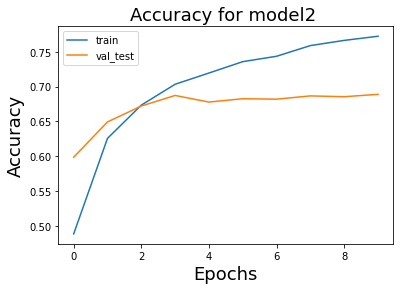

In [ ]:
plt.plot(history2.history["accuracy"], label = "train")
plt.plot(history2.history["val_accuracy"], label = "val_test")
plt.legend()
plt.title("Accuracy for model2 ",fontsize = 18)
plt.ylabel("Accuracy",fontsize = 18)
plt.xlabel("Epochs",fontsize = 18)
plt.show()

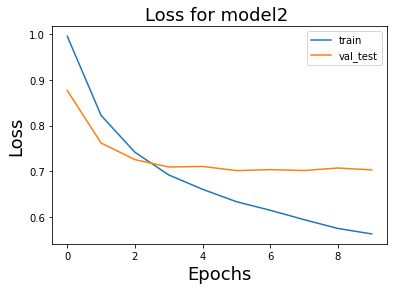

In [ ]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "val_test")
plt.legend()
plt.title("Loss for model2 ",fontsize = 18)
plt.ylabel("Loss",fontsize = 18)
plt.xlabel("Epochs",fontsize = 18)
plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 68.93%


In [ ]:
joblib.dump(model, "/content/drive/file_path/s_a_modelrmsprop.sav")

['/content/drive/My Drive/Colab Notebookss/movies_scrapping/models/s_a_modelrmsprop.sav']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n--- Classification report for test data ---\n")
print(classification_report(y_test, y_pred))


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3165
           1       0.64      0.41      0.50      3216
           2       0.75      0.74      0.75      3619

   micro avg       0.73      0.62      0.67     10000
   macro avg       0.72      0.62      0.66     10000
weighted avg       0.72      0.62      0.66     10000
 samples avg       0.62      0.62      0.62     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3165
           1       0.64      0.41      0.50      3216
           2       0.75      0.74      0.75      3619

   micro avg       0.73      0.62      0.67     10000
   macro avg       0.72      0.62      0.66     10000
weighted avg       0.72      0.62      0.66     10000
 samples avg       0.62      0.62      0.62     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
